# Power Consumption Data of Tetouan City - 

Multi Variate Time Series Forecasting of Power Consumtion Data Using Deep Learning Models

In [1]:
# pip install darts

In [2]:
import pandas as pd
import numpy as np

%reload_ext autoreload
%autoreload 2 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from darts import TimeSeries
from darts.models import NaiveSeasonal
from darts.utils.statistics import plot_acf, check_seasonality

from darts.metrics import rmse

from darts.models import NBEATSModel

from darts.dataprocessing import Pipeline
from darts.metrics import mape

The `LightGBM` module could not be imported. To enable LightGBM support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md
The `Prophet` module could not be imported. To enable Prophet support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md
The `CatBoost` module could not be imported. To enable CatBoost support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md


In [3]:
from darts.dataprocessing.transformers import (
    Scaler,
    MissingValuesFiller,
    Mapper,
    InvertibleMapper,
)

In [4]:
from darts.models import ExponentialSmoothing
from darts.models import RNNModel, BlockRNNModel

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests

# Load Data

In [6]:
pwd

'/Users/ma04676/Desktop/Baseer'

In [7]:
df=pd.read_csv('Tetuan City power consumption.csv')

In [8]:
df

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [9]:
df['date'] = pd.to_datetime(df['DateTime'])

In [10]:
df = df.set_index('date')

In [11]:
df_new = df.drop('DateTime', axis=1)

# Sampling for Plot

In [12]:
df_rs = df_new.resample(rule='24H').mean()

In [13]:
df_rs

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
date,,,,,,,,
2017-01-01,9.675299,68.519306,0.315146,121.390771,25.993924,28465.232067,17737.791287,17868.795181
2017-01-02,12.476875,71.456319,0.076563,120.404486,27.227410,28869.493671,19557.725431,17820.763053
2017-01-03,12.100000,74.981667,0.076715,120.686014,28.574660,30562.447257,20057.269504,17620.803213
2017-01-04,10.509479,75.459792,0.082417,122.959319,28.827222,30689.831224,20102.077001,17673.694779
2017-01-05,10.866444,71.040486,0.083896,118.749861,29.741437,30802.911393,20033.941237,17664.176707
...,...,...,...,...,...,...,...,...
2017-12-26,11.621840,69.070903,0.083062,106.836687,50.760389,30013.476975,24757.006239,11395.678272
2017-12-27,15.232917,59.445903,0.082028,95.890674,41.705062,29966.962399,25057.481845,11498.279312
2017-12-28,13.662361,62.839375,0.081354,112.620160,30.209361,30267.004647,24585.251099,11167.026811


<Axes: xlabel='date'>

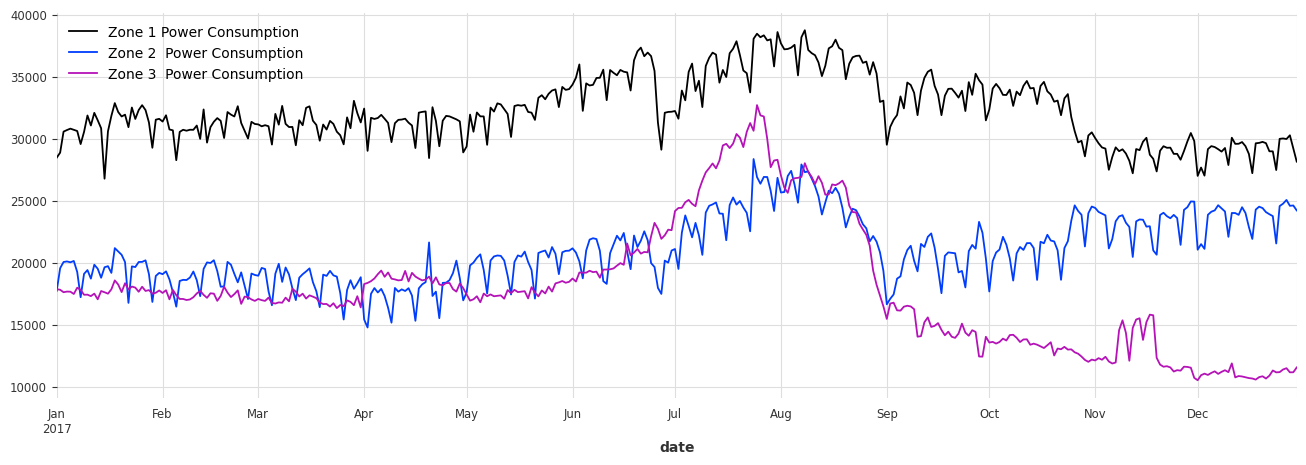

In [14]:
df_rs['Zone 1 Power Consumption'].plot(figsize=(16,5), legend=True)
df_rs['Zone 2  Power Consumption'].plot(figsize=(16,5), legend=True)
df_rs['Zone 3  Power Consumption'].plot(figsize=(16,5), legend=True)

# Original Sampling

In [15]:
df_rs2 = df_new.resample(rule='6H').mean()

In [16]:
df_rs['day'] = df_rs.index.day_of_week
df_rs['quarter'] = df_rs.index.quarter

# Impact of temp on power consumption

In [17]:
Greater than 3rd quatile - search boxplot

SyntaxError: invalid decimal literal (994596336.py, line 1)

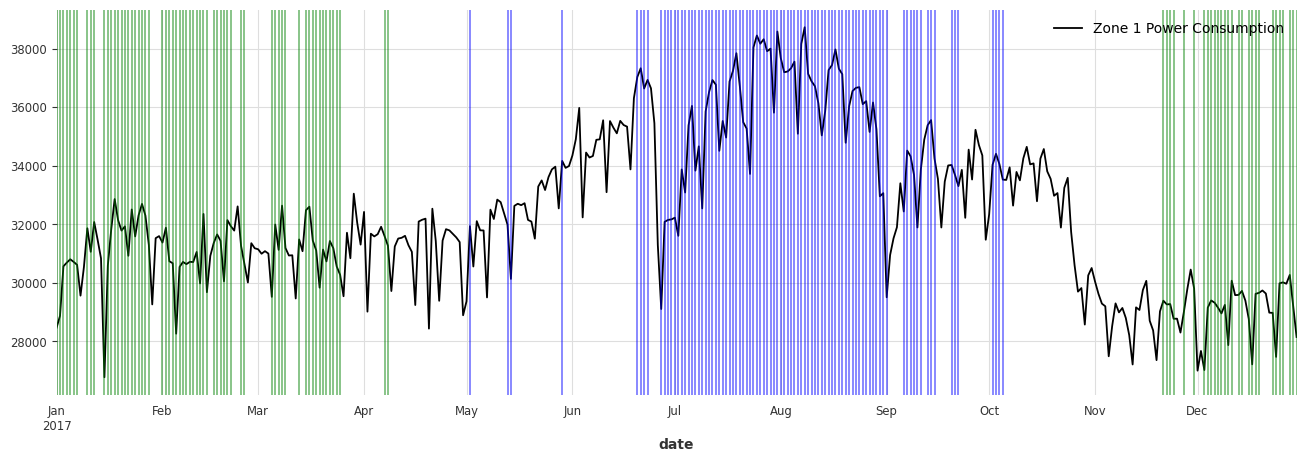

In [18]:
ax = df_rs['Zone 1 Power Consumption'].plot(figsize=(16,5), legend=True)
#ax = df_rs['Zone 2  Power Consumption'].plot(figsize=(16,5), legend=True)
#ax = df_rs['Zone 3  Power Consumption'].plot(figsize=(16,5), legend=True)
for day in df_rs[df_rs["Temperature"]>=df['Temperature'].quantile(0.75)].index:
    #print(day)
    ax.axvline(x=day,color='blue',alpha=0.5)
for day in df_rs[df_rs["Temperature"]<=df['Temperature'].quantile(0.25)].index:
    #print(day)
    ax.axvline(x=day, color='green',alpha=0.5)

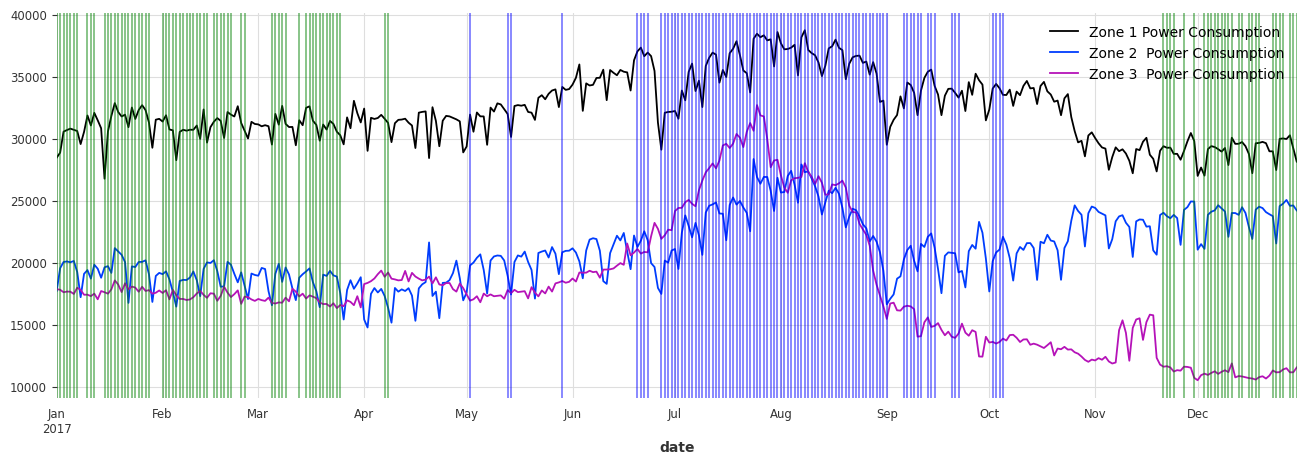

In [19]:
ax= df_rs['Zone 1 Power Consumption'].plot(figsize=(16,5), legend=True)
ax = df_rs['Zone 2  Power Consumption'].plot(figsize=(16,5), legend=True)
ax = df_rs['Zone 3  Power Consumption'].plot(figsize=(16,5), legend=True)

for day in df_rs[df_rs["Temperature"]>=df['Temperature'].quantile(0.75)].index:
    #print(day)
    ax.axvline(x=day,color='blue',alpha=0.5)
for day in df_rs[df_rs["Temperature"]<=df['Temperature'].quantile(0.25)].index:
    #print(day)
    ax.axvline(x=day, color='green',alpha=0.5)

# Pearson Correlation Test

<Axes: >

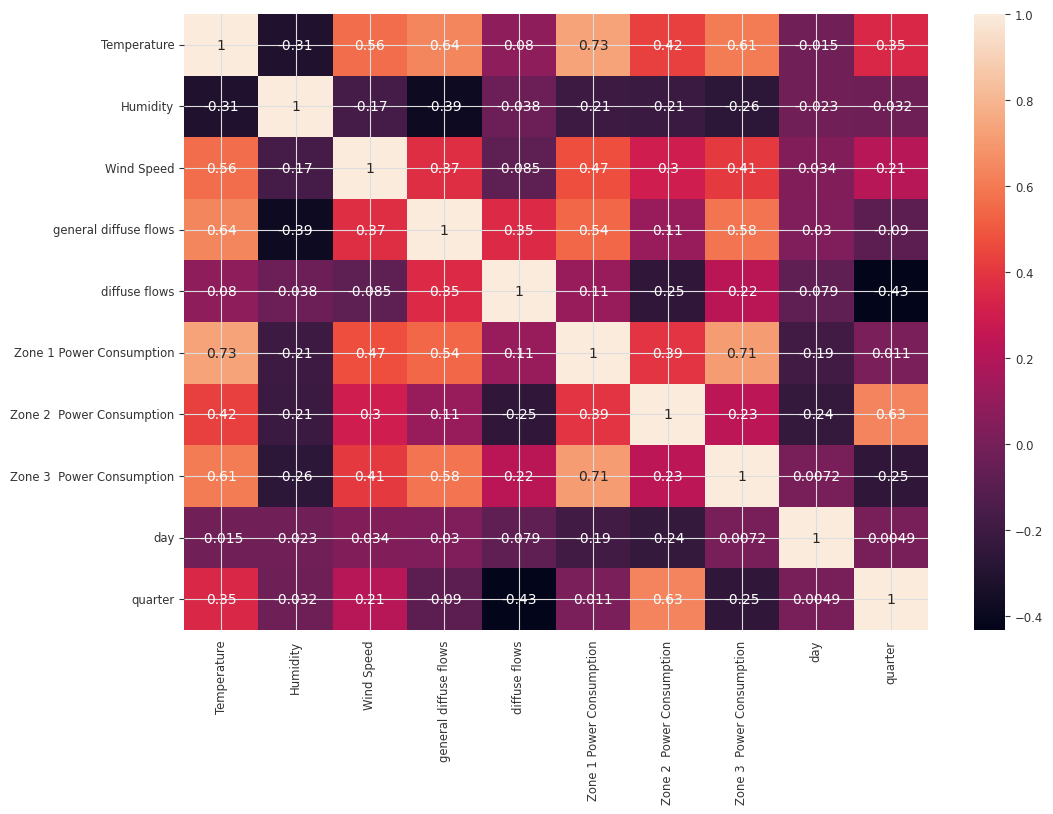

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df_rs.corr(), annot=True)

# Drop General Diffusre flows and Diffuse Flow

# Seasonality Decomposition

<Figure size 1600x500 with 0 Axes>

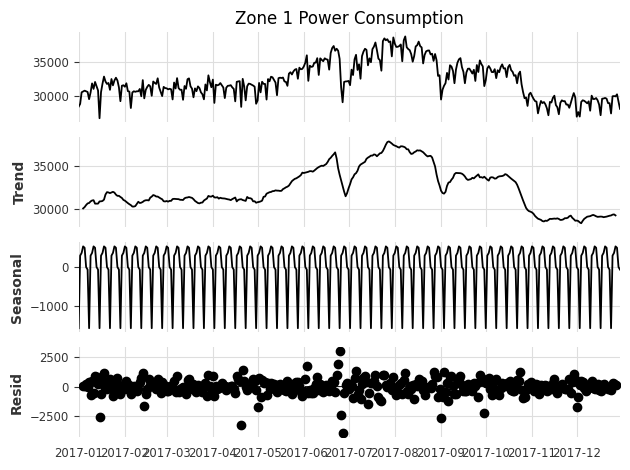

In [21]:
plt.figure(figsize=(16,5))
result = seasonal_decompose(df_rs['Zone 1 Power Consumption'], model='addition')
result.plot()
plt.show()

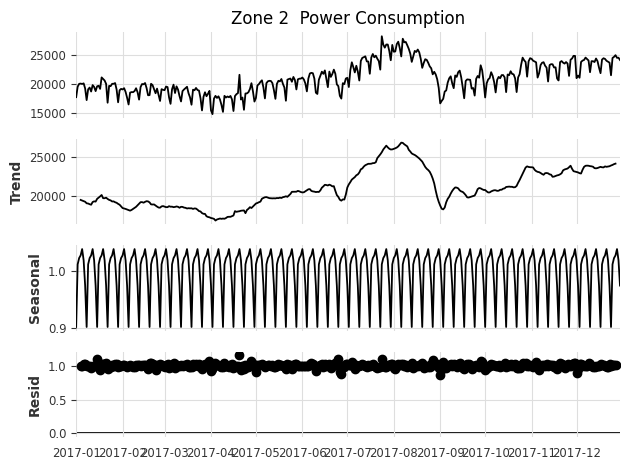

In [22]:
result = seasonal_decompose(df_rs['Zone 2  Power Consumption'], model='multiplication')
result.plot()
plt.show()

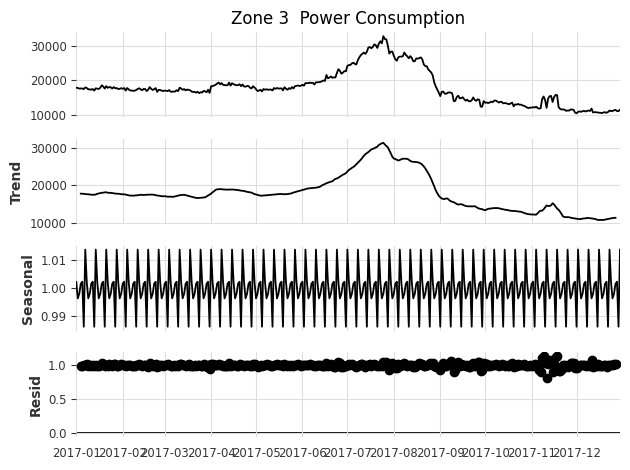

In [23]:
result = seasonal_decompose(df_rs['Zone 3  Power Consumption'], model='multiplication')
result.plot()
plt.show()

# ADFuller Test

In [24]:

def test_stationarity(timeseries):
    #determiniung rolling statistics
    rolmean = timeseries.rolling(14).mean()
    rolstd = timeseries.rolling(14).std()
    #plot rolling statistics:
    plt.plot(timeseries, color='blue',label='original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black',label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    #perform dickey fuller test
    print('Result of dickey fuller test')
    adft = adfuller(timeseries,autolag='AIC')
    #output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] = values
    print(output)

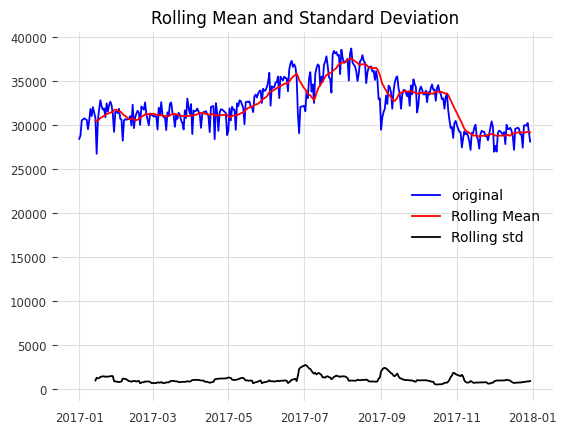

Result of dickey fuller test
Test Statistics                 -1.559147
p-value                          0.504076
No. of lags used                14.000000
Number of observations used    349.000000
critical value (1%)             -3.449227
critical value (5%)             -2.869857
critical value (10%)            -2.571201
dtype: float64


In [25]:
series1 = df_rs[['Zone 1 Power Consumption']]
test_stationarity(series1)    

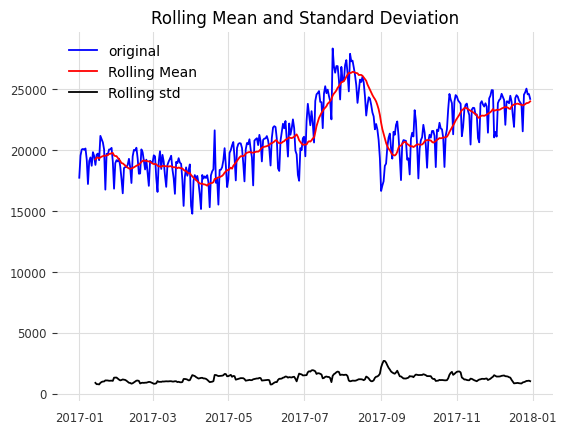

Result of dickey fuller test
Test Statistics                 -1.525507
p-value                          0.520858
No. of lags used                15.000000
Number of observations used    348.000000
critical value (1%)             -3.449282
critical value (5%)             -2.869881
critical value (10%)            -2.571214
dtype: float64


In [26]:
series2 = df_rs[['Zone 2  Power Consumption']]
test_stationarity(series2)    

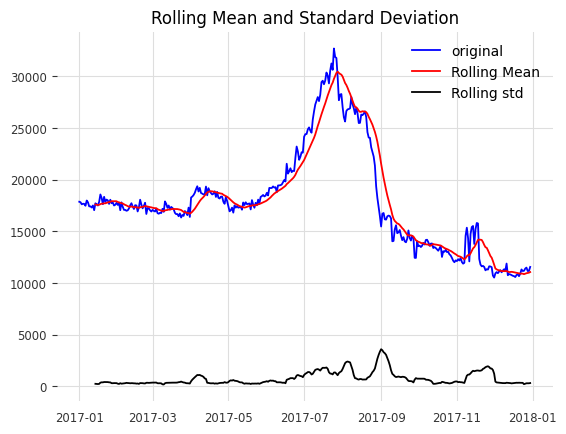

Result of dickey fuller test
Test Statistics                 -1.499794
p-value                          0.533613
No. of lags used                16.000000
Number of observations used    347.000000
critical value (1%)             -3.449337
critical value (5%)             -2.869906
critical value (10%)            -2.571227
dtype: float64


In [27]:
series3 = df_rs[['Zone 3  Power Consumption']]
test_stationarity(series3)    

# Grangers Causality Test

 This test is a hypothesis test to determine if one time series is useful in forecasting another
Changes in one series correlated to changes in another after a consistent amount of time

In [28]:
grangercausalitytests(df_rs[['Zone 1 Power Consumption','Zone 2  Power Consumption']], maxlag=1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1244  , p=0.2897  , df_denom=360, df_num=1
ssr based chi2 test:   chi2=1.1338  , p=0.2870  , df=1
likelihood ratio test: chi2=1.1320  , p=0.2873  , df=1
parameter F test:         F=1.1244  , p=0.2897  , df_denom=360, df_num=1


{1: ({'ssr_ftest': (1.1244217476666838, 0.2896792201096868, 360.0, 1),
   'ssr_chi2test': (1.1337919288972396, 0.28696795655303176, 1),
   'lrtest': (1.132024967909274, 0.28734382143239534, 1),
   'params_ftest': (1.12442174766645, 0.2896792201097104, 360.0, 1.0)},
   array([[0., 1., 0.]])])}

In [29]:
grangercausalitytests(df_rs[['Zone 2  Power Consumption','Zone 3  Power Consumption']], maxlag=1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5082  , p=0.2202  , df_denom=360, df_num=1
ssr based chi2 test:   chi2=1.5208  , p=0.2175  , df=1
likelihood ratio test: chi2=1.5176  , p=0.2180  , df=1
parameter F test:         F=1.5082  , p=0.2202  , df_denom=360, df_num=1


{1: ({'ssr_ftest': (1.5082215442022622, 0.22021297986103558, 360.0, 1),
   'ssr_chi2test': (1.5207900570706143, 0.21749997320552142, 1),
   'lrtest': (1.5176132485803464, 0.2179810374803663, 1),
   'params_ftest': (1.5082215442020537, 0.22021297986107638, 360.0, 1.0)},
   array([[0., 1., 0.]])])}

In [30]:
grangercausalitytests(df_rs[['Zone 1 Power Consumption','Zone 3  Power Consumption']], maxlag=1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=28.0577 , p=0.0000  , df_denom=360, df_num=1
ssr based chi2 test:   chi2=28.2915 , p=0.0000  , df=1
likelihood ratio test: chi2=27.2431 , p=0.0000  , df=1
parameter F test:         F=28.0577 , p=0.0000  , df_denom=360, df_num=1


{1: ({'ssr_ftest': (28.05769585537815, 2.054934107023458e-07, 360.0, 1),
   'ssr_chi2test': (28.291509987506295, 1.0435266652179057e-07, 1),
   'lrtest': (27.243149192856436, 1.7940969689215254e-07, 1),
   'params_ftest': (28.05769585537837, 2.0549341070232351e-07, 360.0, 1.0)},
   array([[0., 1., 0.]])])}

In [31]:
# df_rs.index

# Building Data in Darts Format

In [32]:
series1 = TimeSeries.from_dataframe(df_rs.reset_index(), time_col='date', value_cols='Zone 1 Power Consumption' )
series2 = TimeSeries.from_dataframe(df_rs.reset_index(), time_col='date', value_cols='Zone 2  Power Consumption')
series3 = TimeSeries.from_dataframe(df_rs.reset_index(), time_col='date', value_cols='Zone 3  Power Consumption')

In [33]:
train_ser1, validate_ser1 = series1.split_before(pd.Timestamp("2017-12-1"))
train_ser2, validate_ser2 = series2.split_before(pd.Timestamp("2017-12-1"))
train_ser3, validate_ser3 = series3.split_before(pd.Timestamp("2017-12-1"))

len(train_ser1), len(validate_ser1), len(train_ser2), len(validate_ser2), len(train_ser2), len(validate_ser2)

(334, 30, 334, 30, 334, 30)

In [34]:
# train_ser1

# Basic Exponential Smoothing

In [35]:
def plot_and_score(forecast, validate_ser, series):
    plt.title('MAPE = {:.2f}%'.format(mape(forecast, validate_ser)))
    series.plot(label='actual-1')
    forecast.plot(label='forecast-exp')
    plt.legend()
    plt.show()

    print("MAPE = {:.2f}%".format(mape(forecast, validate_ser)))
    return None

/Users/ma04676/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


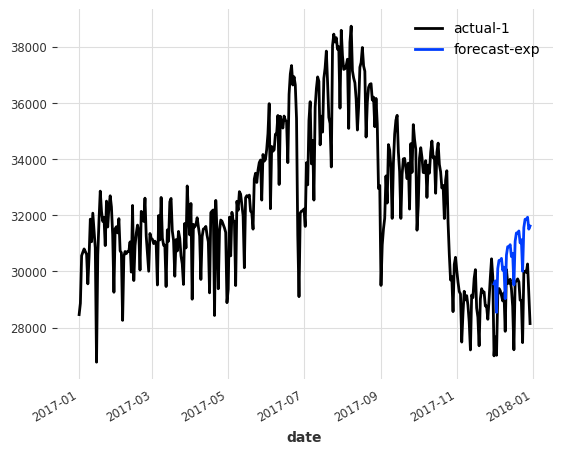

MAPE = 5.36%


In [36]:
model_exp = ExponentialSmoothing()
model_exp.fit(train_ser1)
forecast_exp = model_exp.predict(30)
forecast_exp = model_exp.predict(30)
plot_and_score(forecast_exp, validate_ser1, series1)

/Users/ma04676/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


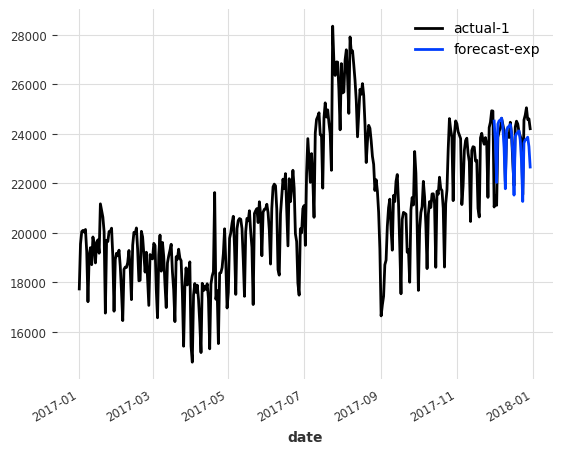

MAPE = 2.79%


In [37]:
model_exp2 = ExponentialSmoothing()
model_exp2.fit(train_ser2)
forecast_exp2 = model_exp2.predict(30)
plot_and_score(forecast_exp2, validate_ser2, series2)

/Users/ma04676/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


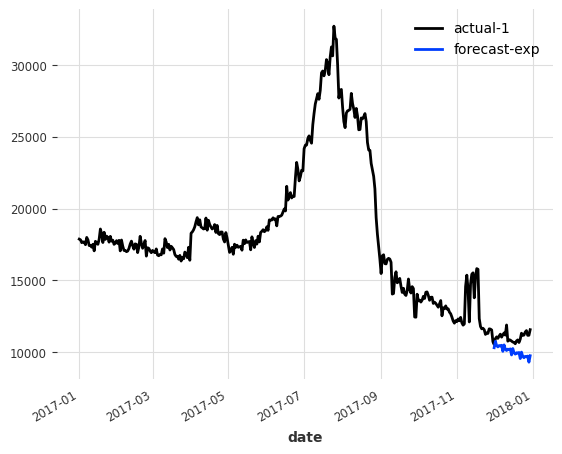

MAPE = 10.07%


In [38]:
model_exp3 = ExponentialSmoothing()
model_exp3.fit(train_ser3)
forecast_exp3 = model_exp3.predict(30)
plot_and_score(forecast_exp3, validate_ser3, series3)

# Block RNN Model

In [39]:
scaler1=Scaler()
scaler2=Scaler()
scaler3=Scaler()

train_set1=scaler1.fit_transform(train_ser1)
train_set2=scaler2.fit_transform(train_ser2)
train_set3=scaler3.fit_transform(train_ser3)

eval_set1=scaler1.transform(validate_ser1)
eval_set2=scaler2.transform(validate_ser2)
eval_set3=scaler3.transform(validate_ser3)

set1=scaler1.transform(series1)
set2=scaler2.transform(series2)
set3=scaler3.transform(series3)

In [40]:
brnn = BlockRNNModel(input_chunk_length=24,
                    output_chunk_length=10,
                    n_rnn_layers=2)

In [41]:
brnn.fit([train_set1, train_set2,train_set3], epochs=300, verbose=True)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 2.0 K 
4 | fc            | Sequential       | 260   
---------------------------------------------------
2.3 K     Trainable params
0         Non-trainable params
2.3 K     Total params
0.009     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=300` reached.


BlockRNNModel(model=RNN, hidden_dim=25, n_rnn_layers=2, hidden_fc_sizes=None, dropout=0.0, input_chunk_length=24, output_chunk_length=10)

In [42]:
forecast_rnn1 = brnn.predict(30, series = train_set1)
forecast_rnn2 = brnn.predict(30, series = train_set2)
forecast_rnn3 = brnn.predict(30, series = train_set3)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

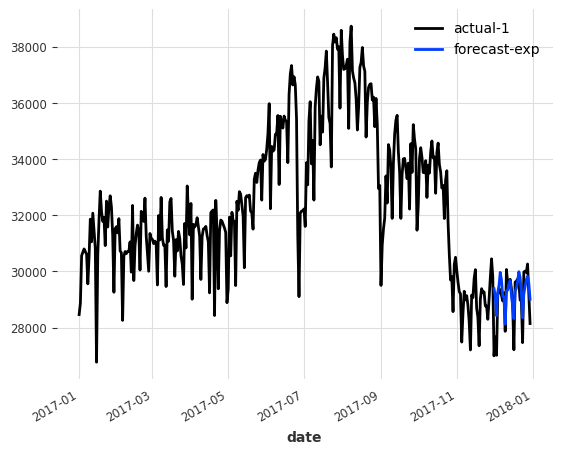

MAPE = 1.82%


In [43]:
forecast_rnn_t1 = scaler1.inverse_transform(forecast_rnn1)
plot_and_score(forecast_rnn_t1, validate_ser1, series1)

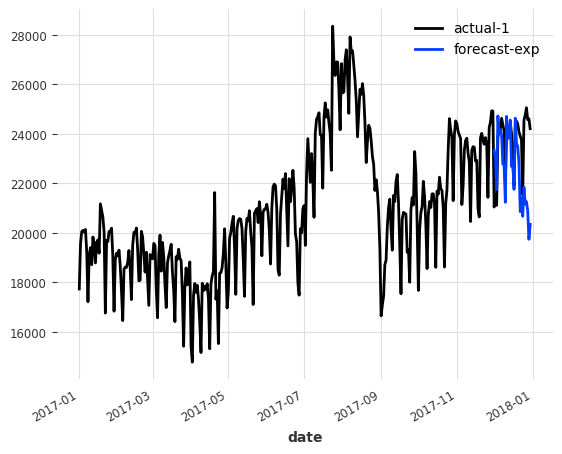

MAPE = 6.90%


In [44]:
forecast_rnn_t2 = scaler2.inverse_transform(forecast_rnn2)
plot_and_score(forecast_rnn_t2, validate_ser2, series2)

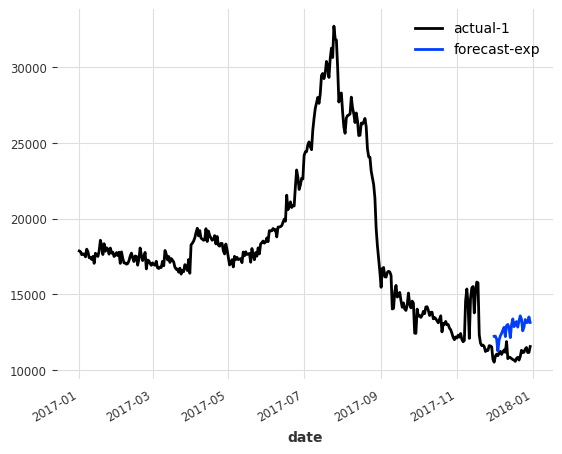

MAPE = 13.45%


In [45]:
forecast_rnn_t3 = scaler3.inverse_transform(forecast_rnn3)
plot_and_score(forecast_rnn_t3, validate_ser3, series3)

# Bring Covariates

In [46]:
temp_series = TimeSeries.from_dataframe(df=df_rs.reset_index(), time_col='date', value_cols='Temperature')
hum_series =TimeSeries.from_dataframe(df=df_rs.reset_index(), time_col='date', value_cols='Humidity')
wind_series = TimeSeries.from_dataframe(df=df_rs.reset_index(), time_col='date', value_cols='Wind Speed')

In [47]:
pc_co = temp_series.stack(hum_series).stack(wind_series)
scaler_co = Scaler()
pc_cov = scaler_co.fit_transform(pc_co)

In [48]:
# Train Test Split 
train_cov, validate_cov = pc_cov.split_before(pd.Timestamp("2017-12-1"))

In [49]:
model_cov = BlockRNNModel(
                model ="LSTM",
                input_chunk_length = 24,
                output_chunk_length = 10,
                n_epochs=100,
                random_state=0)

In [ ]:
model_cov.fit(series= [train_set1, train_set2, train_set3],
             past_covariates = [train_cov, train_cov, train_cov],
             verbose=True)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 3.1 K 
4 | fc            | Sequential       | 260   
---------------------------------------------------
3.4 K     Trainable params
0         Non-trainable params
3.4 K     Total params
0.013     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

In [ ]:
1) Using a single model to forecast all zones power consumpitio

2) LSTM Deep learning model for forecasting - using deep larning to forecast power consumtion

3) Additional Covariates data 